In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col=0)

Now that the dataset is mostly clean, I am going to examine how being an immigrant affects test scores, positive feelings in school and negative experiences in school across different countries. In this notebook I will be focusing on test scores. 

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

Firstly, I want to have a less granular indicator of test scores. 

In [4]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [5]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [6]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [7]:
pivot_df_avgliteracy = df.pivot_table(values=averages, index=['Country','ASBH02A'], aggfunc='mean').reset_index()

In [8]:
pivot_df_avgliteracy

,Country,ASBH02A,informational_purpose_avg,interpreting_process_avg,literary_purpose_avg,reading_avg,straightforward_process_avg
0,Austria,No,498.657408,497.365857,503.520940,501.137730,503.331516
1,Austria,Yes,533.604588,533.534905,538.353546,535.753998,538.541325
2,Egypt,No,368.944815,376.185753,370.055159,368.778085,364.934062
3,Egypt,Yes,385.238053,382.455807,374.382017,381.017793,378.604022
4,France,No,491.164422,492.907004,494.816631,495.189771,495.147998
5,France,Yes,520.421201,518.050071,524.127303,522.368422,527.467670
6,Germany,No,493.821976,491.637327,503.782080,496.504230,496.581183
7,Germany,Yes,543.667811,543.658520,551.219226,545.941246,546.973033
8,Iran,No,415.629239,418.139679,435.488964,424.286114,429.671741
9,Iran,Yes,421.840284,420.598873,422.984017,422.865906,423.450890


## Heat map stuff

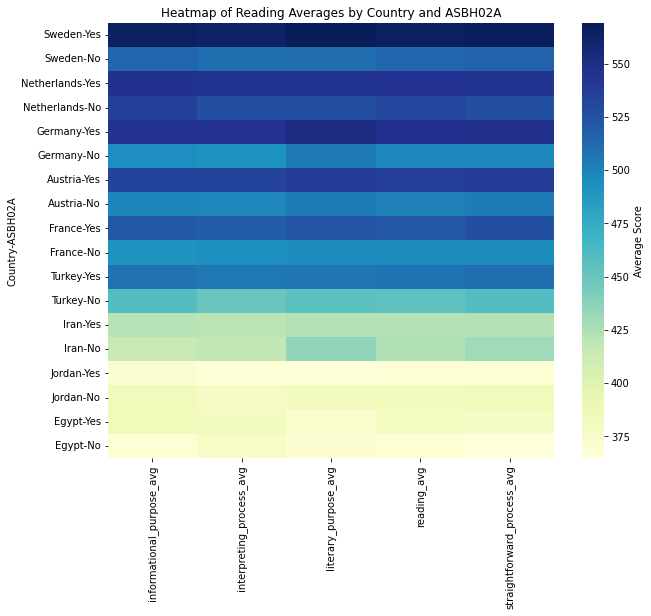

In [9]:
# Calculate the total average for each row
pivot_df_avgliteracy['MeanTotal'] = pivot_df_avgliteracy[['informational_purpose_avg', 'interpreting_process_avg', 'literary_purpose_avg', 'reading_avg', 'straightforward_process_avg']].mean(axis=1)

# Sort countries by the total average
country_averages = pivot_df_avgliteracy.groupby('Country')['MeanTotal'].mean().sort_values(ascending=False).index.tolist()

# Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

# Sort the DataFrame
pivot_df_avgliteracy['Country'] = pd.Categorical(pivot_df_avgliteracy['Country'], categories=country_averages, ordered=True)
pivot_df_avgliteracy['ASBH02A'] = pd.Categorical(pivot_df_avgliteracy['ASBH02A'], categories=asbh02a_sorter, ordered=True)

pivot_df_avgliteracy = pivot_df_avgliteracy.sort_values(['Country', 'ASBH02A'])

# Drop the 'MeanTotal' column for the heatmap
df_heatmap = pivot_df_avgliteracy.drop(columns=['MeanTotal'])

# Set the index to ['Country', 'ASBH02A'] for the heatmap
df_heatmap.set_index(['Country', 'ASBH02A'], inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Average Score'})
plt.title('Heatmap of Reading Averages by Country and ASBH02A')
plt.show()

Literary purpose is a bit darker so perhaps those questions are a bit easier? Immigrants in Iran seem to do better than natives but this is perhaps not so surprising as the majority of immigrants in Iran are from Afghanistan? and have same language?